In [4]:
import numpy as np
import csv
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam#Try all of these

print(tf.__version__)

2.5.0


In [1]:
!wget "https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip" 

--2021-07-30 20:33:52--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.36.226
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.36.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1061576029 (1012M) [binary/octet-stream]
Saving to: ‘dataset52a7b21.zip’

dataset52a7b21.zip  100%[===================>]   1012M  13.9MB/s    in 76s     

2021-07-30 20:35:09 (13.4 MB/s) - ‘dataset52a7b21.zip’ saved [1061576029/1061576029]



In [2]:
!unzip /content/dataset52a7b21.zip

Archive:  /content/dataset52a7b21.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        
  inflating: dataset/.~lock.train.csv#  


In [5]:
train_df=pd.read_csv('dataset/train.csv',escapechar = "\\",quoting = csv.QUOTE_NONE)

In [7]:
!rm dataset/train.csv

In [8]:
x = train_df['TITLE'].astype('str')

In [9]:
y = train_df['BROWSE_NODE_ID']

In [10]:
del(train_df)

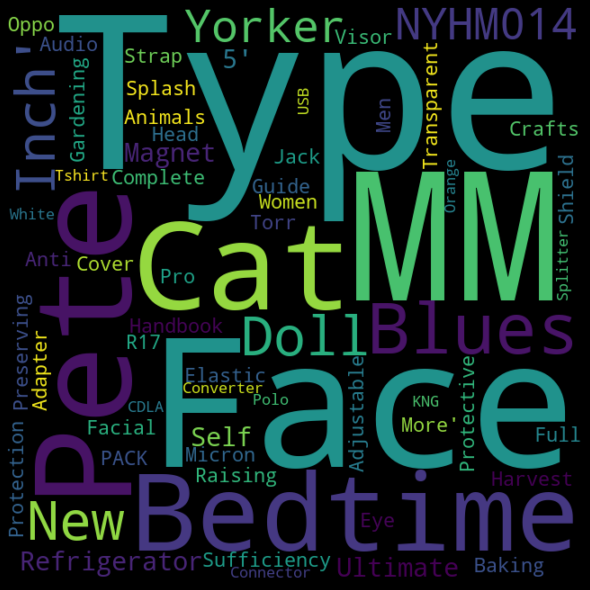

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = x.values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

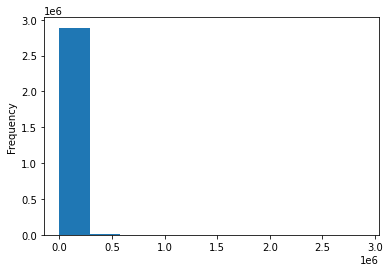

In [12]:
y.plot(kind='hist') # so most of the node ids are between 0 and 0..3e6. This is the kind of biased train data we are given.

In [13]:
max_features = 200000
max_text_length = 400 #find the text with max length in code and change it for each column

In [15]:
x_tokenizer =text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
print("Happened")
x_tokenized = x_tokenizer.texts_to_sequences(x)
print("Happened")
x_train_val = sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

Happened
Happened


In [20]:
del(x)

In [16]:
x_tokenizer.word_index#sanity check

{'for': 1,
 'with': 2,
 'cover': 3,
 'and': 4,
 'black': 5,
 'of': 6,
 "women's": 7,
 '2': 8,
 "men's": 9,
 'back': 10,
 'cotton': 11,
 'printed': 12,
 'blue': 13,
 'case': 14,
 'set': 15,
 '1': 16,
 'pack': 17,
 '3': 18,
 'white': 19,
 '5': 20,
 'women': 21,
 'x': 22,
 'fit': 23,
 'shirt': 24,
 '6': 25,
 '4': 26,
 'size': 27,
 'red': 28,
 't': 29,
 'designer': 30,
 'large': 31,
 'girls': 32,
 'inch': 33,
 '8': 34,
 'pink': 35,
 'regular': 36,
 'color': 37,
 'in': 38,
 '7': 39,
 'green': 40,
 '10': 41,
 'men': 42,
 'hard': 43,
 'samsung': 44,
 'soft': 45,
 'home': 46,
 'slim': 47,
 'leather': 48,
 'car': 49,
 'light': 50,
 'galaxy': 51,
 'casual': 52,
 'grey': 53,
 'free': 54,
 'mobile': 55,
 'pro': 56,
 'glass': 57,
 'by': 58,
 'brown': 59,
 'baby': 60,
 'gold': 61,
 'dress': 62,
 'design': 63,
 '12': 64,
 'kids': 65,
 'uk': 66,
 'shoes': 67,
 'yellow': 68,
 'full': 69,
 'multi': 70,
 'silver': 71,
 '9': 72,
 'm': 73,
 'combo': 74,
 '100': 75,
 'wall': 76,
 'bag': 77,
 'top': 78,
 'cm

In [17]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-07-30 20:47:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-30 20:47:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-30 20:47:07--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [18]:
embedding_dim = 300
embedding_index = dict()
f = open('glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embedding_index))

Loaded 400000 word vectors.


In [22]:
!rm glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip dataset52a7b21.zip  glove.6B.200d.txt  glove.6B.50d.txt

rm: cannot remove 'glove.6B.100d.txt': No such file or directory
rm: cannot remove 'glove.6B.300d.txt': No such file or directory
rm: cannot remove 'glove.6B.zip': No such file or directory
rm: cannot remove 'dataset52a7b21.zip': No such file or directory
rm: cannot remove 'glove.6B.200d.txt': No such file or directory
rm: cannot remove 'glove.6B.50d.txt': No such file or directory


In [23]:
'''EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,(NUM_WORDS))

embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))


for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        vec = np.zeros(EMBEDDING_DIM)

del(word_vectors)#to free up space'''

'EMBEDDING_DIM=300\nvocabulary_size=min(len(word_index)+1,(NUM_WORDS))\n\nembedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))\n\n\nfor word, i in word_index.items():\n    if i>=NUM_WORDS:\n        continue\n    try:\n        embedding_vector = word_vectors[word]\n        embedding_matrix[i] = embedding_vector\n    except KeyError:\n        vec = np.zeros(EMBEDDING_DIM)\n\ndel(word_vectors)#to free up space'

In [24]:
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, index in x_tokenizer.word_index.items():
  if index>max_features -1:
    break
  else:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector
del(embedding_vector)

In [25]:
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(
                        embedding_matrix),trainable=False))
model.add(Dropout(0.2))


In [26]:
del(embedding_matrix)

### Building The Model

In [27]:
filters = 250
kernel_size = 3
hidden_dims = 250

In [28]:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid'))
model.add(MaxPooling1D())
model.add(Conv1D(filters,
                 5,
                 padding='valid',
                 activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         60000000  
_________________________________________________________________
dropout (Dropout)            (None, None, 300)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 250)         225250    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 250)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 250)         312750    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               6

In [29]:
opt = Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

Train Model

In [30]:
x_train_val

array([[   0,    0,    0, ...,  263,   20,   33],
       [   0,    0,    0, ...,   22,   18,   20],
       [   0,    0,    0, ..., 2412,    4, 1122],
       ...,
       [   0,    0,    0, ...,   21, 1038, 4599],
       [   0,    0,    0, ...,  939, 2245,   19],
       [   0,    0,    0, ...,  240,  450,  347]], dtype=int32)

In [31]:
print("shape of x is:",x_train_val.shape)
print("shape of y is:",y.shape)

shape of x is: (2903024, 400)
shape of y is: (2903024,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val,
                                                  y,
                                                  random_state=1,
                                                  test_size=0.15)

In [ ]:
%%time
batch_size = 32
epochs = 3

callbacks = [EarlyStopping(monitor='val_loss')]
hist_adam = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_val,y_val),
         callbacks=callbacks)

In [ ]:
sequence_length = train_df.shape[1]
filter_sizes = [3,4]
num_filters = 100
drop = 0.4

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)

merged_tensor = concatenate([maxpool_0, maxpool_1], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((2*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
conc = Dense(40)(dropout)
output = Dense(units=6, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))(conc)

# this creates a model that includes
model = Model(inputs, output)

In [ ]:
opt = Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy',optimizer=opt)

# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_loss')]
hist_adam = model.fit(X_train, y_train, batch_size=1000, epochs=20, verbose=2, validation_data=(X_val, y_val),
         callbacks=callbacks)

In [ ]:
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(hist_adam.history['loss'], color='b', label='Training Loss')
plt.plot(hist_adam.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

In [ ]:
sequences_test=tokenizer.texts_to_sequences(X_test)
X_test2 = pad_sequences(sequences_test,maxlen=X_train.shape[1])

In [ ]:
col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

# Predict on train, val and test datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test2)
pred_val = model.predict(X_val)

# Emply array to collect AUC scores
AUC = np.zeros((3,6))
AUC


In [ ]:
from sklearn import metrics
for i,x in enumerate(col):
    auc = np.array([metrics.roc_auc_score(y_train[:,i], pred_train[:,i]),
                    metrics.roc_auc_score(y_val[:,i], pred_val[:,i]),
                    metrics.roc_auc_score(y_test[x], pred_test[:,i])])
    print(x,"Train AUC:",auc[0],", Val AUC:",auc[1],", Test AUC:",auc[2])
    AUC[:,i] = auc
    
avg_auc = AUC.mean(axis=1)
print("Average Train AUC:",avg_auc[0],", Average Val AUC:",avg_auc[1],", Average Test AUC:",avg_auc[2])